# Modelo Black-Scholes: Movimiento Browniano Geométrico en Finanzas

## Introducción: El Movimiento de Precios de Activos

En econofísica, los precios de activos financieros se modelan como **procesos estocásticos** que evolucionan según reglas probabilísticas. La pregunta fundamental es: **¿Cuál es el mejor modelo matemático para describir cómo cambian los precios?**

### Observaciones de la Realidad

1. Los precios **no son predecibles** con certeza (hay ruido aleatorio)
2. Los precios tienen **tendencia** a crecer en promedio (tasa de retorno positiva)
3. La volatilidad es **aleatoria** pero predecible en promedio
4. Los precios **nunca son negativos** (no podemos perder más del 100%)

## El Modelo Black-Scholes

### Ecuación Diferencial Estocástica (SDE)

El modelo Black-Scholes describe la evolución del precio como:

$$dS_t = \mu S_t \, dt + \sigma S_t \, dW_t$$

Donde:
- $S_t$ = Precio en tiempo $t$
- $\mu$ = **Drift** (tasa de retorno esperada)
- $\sigma$ = **Volatilidad** (desviación estándar de retornos)
- $dW_t$ = Incremento de **Movimiento Browniano** (ruido aleatorio)
- $dt$ = Incremento de tiempo infinitesimal

### Interpretación de la Ecuación

$$\underbrace{\frac{dS_t}{S_t}}_{\text{Retorno}} = \underbrace{\mu \, dt}_{\text{Parte determinista}} + \underbrace{\sigma \, dW_t}_{\text{Parte aleatoria}}$$

**Término de drift** ($\mu dt$):
- Representa la **tendencia esperada** del precio
- $\mu = 0.05$ significa esperar 5% retorno anual
- Es **predecible** en promedio

**Término de volatilidad** ($\sigma dW_t$):
- Representa las **fluctuaciones aleatorias**
- $\sigma = 0.2$ significa 20% volatilidad anual
- $dW_t$ es ruido blanco gaussiano

### Solución Analítica

Aplicando el **lema de Itô** (cálculo estocástico), la solución exacta es:

$$S_T = S_0 \exp\left[\left(\mu - \frac{\sigma^2}{2}\right)T + \sigma W_T\right]$$

Donde:
- $S_0$ = Precio inicial
- $T$ = Tiempo horizonte
- $W_T \sim \mathcal{N}(0, T)$ = Movimiento Browniano en tiempo $T$

**Término $-\frac{\sigma^2}{2}$**: Corrección por **Jensen's Inequality** (convexidad logarítmica)

### Valor Esperado del Precio Final

Tomando esperanza sobre el término aleatorio $W_T$:

$$\mathbb{E}[S_T] = S_0 \exp(\mu T)$$

**Interpretación**:
- El precio promedio crece exponencialmente
- Tasa de crecimiento = drift $\mu$
- Volatilidad solo afecta la **dispersión**, no la media

## Movimiento Browniano Geométrico (GBM)

El modelo Black-Scholes usa un **Movimiento Browniano Geométrico** porque:

### Propiedad 1: Positividad
$$S_T = S_0 e^{(\mu - \frac{\sigma^2}{2})T + \sigma W_T} > 0 \quad \forall \text{ realizaciones}$$

Los precios siempre positivos (no hay precio negativo posible)

### Propiedad 2: Retornos Log-normales
Los **retornos logarítmicos** siguen distribución normal:

$$\ln(S_T / S_0) \sim \mathcal{N}\left[\left(\mu - \frac{\sigma^2}{2}\right)T, \sigma^2 T\right]$$

Esto implica:
- Retornos tienen propiedades analíticas convenientes
- Volatilidad es constante (simplificación)
- Cálculos con opciones se vuelven manejables

### Propiedad 3: Autocontinuidad (Path Continuity)
Los precios evolucionan de forma **continua** (sin saltos)

## Parámetros Clave

| Parámetro | Símbolo | Valor Típico | Significado |
|---|---|---|---|
| Precio Inicial | $S_0$ | 100 | Punto de partida |
| Drift/Retorno | $\mu$ | 0.05 (5%) | Tasa de retorno esperada anual |
| Volatilidad | $\sigma$ | 0.20 (20%) | Desviación estándar de retornos |
| Tiempo Horizonte | $T$ | 1 | Período de análisis (años) |
| Pasos de Tiempo | $N$ | 252 | Días de trading en un año |

## Limitaciones del Modelo

1. **Volatilidad constante**: En realidad, volatilidad cambia (volatilidad estocástica)
2. **Rendimiento continuo**: En realidad hay saltos (modelos con jump diffusion)
3. **Sin fricción**: Ignora costos de transacción
4. **Mercados eficientes**: Asume que los precios reflejan toda información
5. **Normalidad de retornos**: Sabemos que hay colas pesadas en datos reales

## Aplicaciones

- **Valoración de opciones** (fórmula de Black-Scholes)
- **Gestión de riesgo** (Value at Risk)
- **Modelado de volatilidad**
- **Simulación de precios** (Monte Carlo)

## Simulación Monte Carlo

**Estrategia**: En lugar de resolver la SDE analíticamente, simulamos muchas **trayectorias posibles** y promediamos.

1. Generar variables aleatorias normales
2. Calcular trayectoria del precio
3. Repetir miles de veces
4. Usar simulaciones para estimar valores esperados

Esta es la esencia del método usado en el código.

SIMULACIÓN DEL MODELO BLACK-SCHOLES

Parámetros:
  Precio inicial (S0): 100
  Drift (μ): 0.05 (5.0%)
  Volatilidad (σ): 0.2 (20.0%)
  Horizonte (T): 1 año
  Pasos de tiempo (N): 252 días
  Incremento por paso (dt): 0.003968


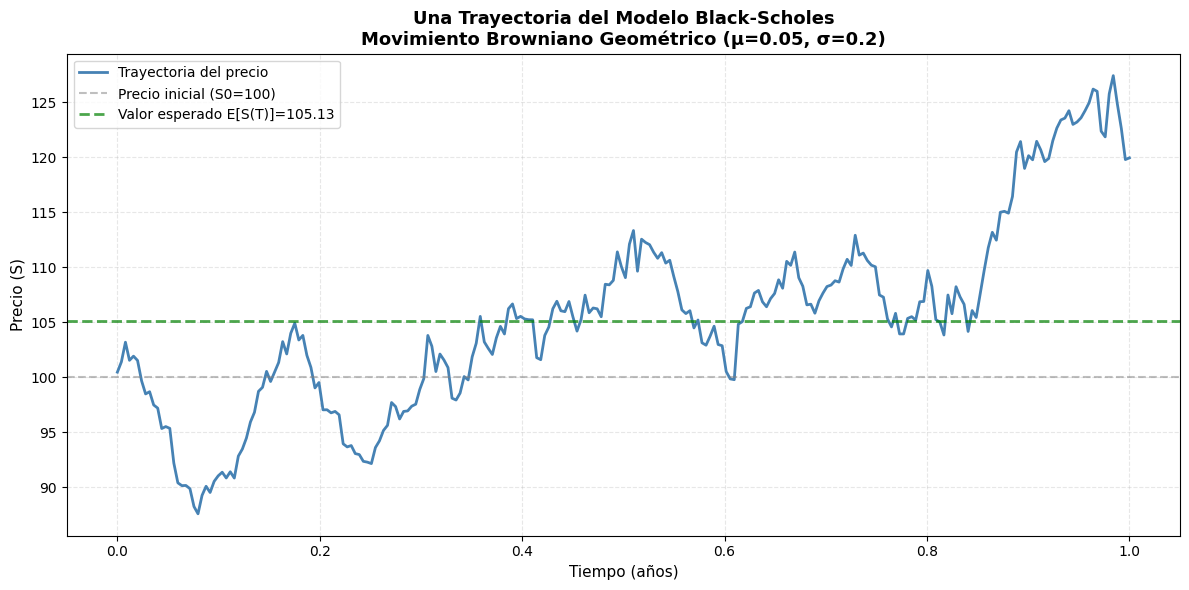


Precio al inicio: S(0) = 100.4582
Precio al final: S(T) = 119.9271
Cambio porcentual: 19.93%

SIMULACIÓN MONTE CARLO - VALIDACIÓN DE FÓRMULA

Ejecutando 10,000 simulaciones...


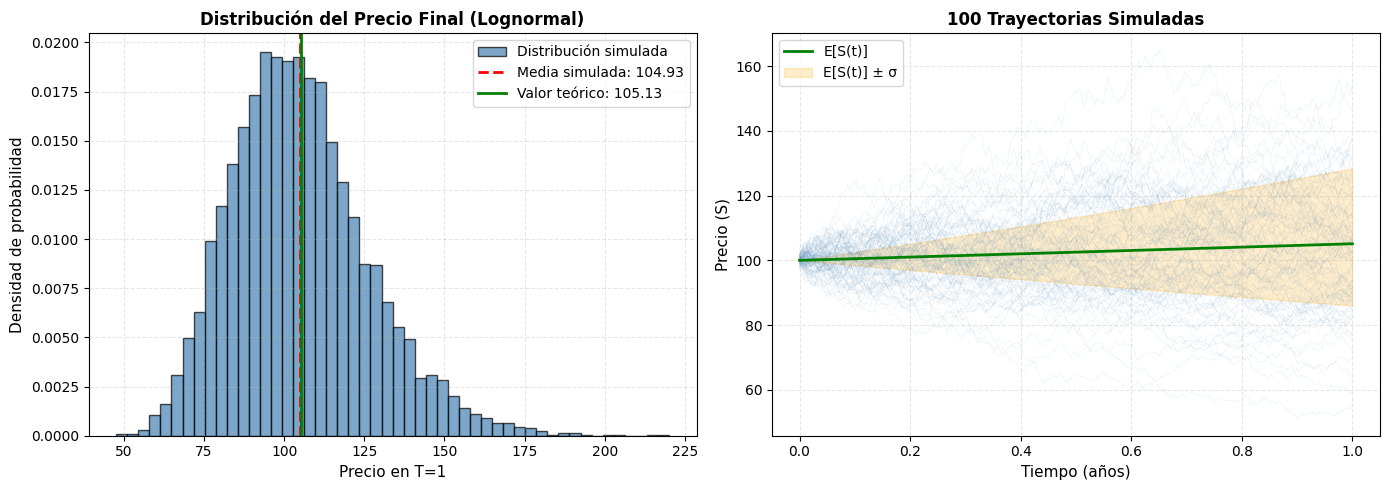


----------------------------------------------------------------------
COMPARACIÓN: SIMULACIÓN vs TEORÍA
----------------------------------------------------------------------

Precio esperado en T=1:
  Fórmula teórica: E[S(T)] = S0 * exp(μ*T)
                         = 100 * exp(0.05*1)
                         = 105.1271

Simulación Monte Carlo (10,000 trayectorias):
  Media simulada:      104.9262
  Desv. Estándar:      21.3916
  Mínimo observado:    47.5997
  Máximo observado:    220.0646

Validación:
  Diferencia:          -0.2009
  Error relativo:      -0.1911%
  ✓ Excelente acuerdo entre simulación y teoría

INTERPRETACIÓN

1. VALOR ESPERADO:
   La media de todas las simulaciones (104.93) 
   coincide con la fórmula teórica (105.13)

   Esto valida que nuestro método Monte Carlo es correcto.

2. DISTRIBUCIÓN:
   Los precios finales siguen distribución LOGNORMAL
   - Log(S(T)) ~ N(ln(S0) + (μ-σ²/2)T, σ²T)
   - Rango: 47.60 a 220.06
   - Asimétrica hacia la derecha (colas pesadas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================================
# SIMULACIÓN DEL MODELO BLACK-SCHOLES
# Movimiento Browniano Geométrico en Finanzas
# ============================================================================

# PARÁMETROS DEL MODELO
# =====================

S0 = 100        # Precio inicial del activo
                # En econofísica, asumimos retornos normalizados
                # S0 = 100 es escala arbitraria

mu = 0.05       # Drift (tasa de retorno esperada)
                # μ = 0.05 significa retorno esperado del 5% anual
                # Este es el componente determinista del crecimiento
                # En la realidad: μ varía por activo y período
                # Acciones: típicamente 7-10%
                # Bonos: típicamente 2-4%
                # Commodities: variable

sigma = 0.2     # Volatilidad (desviación estándar de retornos)
                # σ = 0.2 significa 20% volatilidad anual
                # Interpreta: cambios de precio tienen desv.est. del 20%
                # En realidad:
                # Acciones blue-chip: 10-20%
                # Growth stocks: 20-40%
                # Volatilidad alta (crisis): 40-60%

T = 1           # Horizonte de tiempo (en años)
                # T = 1 significa simulamos 1 año completo

N = 252         # Número de pasos de tiempo
                # 252 = días de trading en un año (de mercado)
                # (365 - fines de semana - feriados ≈ 252)
                # Mayor N = discretización más fina, mayor precisión

dt = T / N      # Incremento de tiempo por paso
                # dt = 1/252 ≈ 0.00397 (un día de trading)

# ============================================================================
# PARTE 1: SIMULACIÓN DE UNA ÚNICA TRAYECTORIA
# ============================================================================
# Demostramos cómo evoluciona el precio en UNA simulación

print("="*70)
print("SIMULACIÓN DEL MODELO BLACK-SCHOLES")
print("="*70)
print(f"\nParámetros:")
print(f"  Precio inicial (S0): {S0}")
print(f"  Drift (μ): {mu} ({mu*100}%)")
print(f"  Volatilidad (σ): {sigma} ({sigma*100}%)")
print(f"  Horizonte (T): {T} año")
print(f"  Pasos de tiempo (N): {N} días")
print(f"  Incremento por paso (dt): {dt:.6f}")

# Generación de MOVIMIENTO BROWNIANO
# ===================================
# W(t) = cumsum(dW) donde dW ~ N(0, sqrt(dt))
#
# EXPLICACIÓN MATEMÁTICA:
# El movimiento browniano W(t) es un proceso estocástico donde:
# - W(0) = 0
# - Incrementos dW ~ N(0, dt) son independientes y gaussianos
# - Camino continuo sin derivada (es decir, irregular)
#
# DISCRETIZACIÓN:
# dW ~ sqrt(dt) * Z donde Z ~ N(0, 1)
# Esto captura la propiedad de escala del movimiento browniano

t = np.linspace(0, T, N)  # Vector de tiempos: [0, dt, 2dt, ..., T]

# Generar incrementos brownianos
incrementos_browniano = np.random.normal(0, np.sqrt(dt), N)

# Movimiento browniano acumulado
W = np.cumsum(incrementos_browniano)

# ECUACIÓN DE SOLUCIÓN BLACK-SCHOLES
# ===================================
# Solución analítica de la SDE dS = μS dt + σS dW
#
# S(T) = S0 * exp[(μ - σ²/2)*T + σ*W(T)]
#
# COMPONENTES:
# - (μ - σ²/2)*T: Drift ajustado (el -σ²/2 es la corrección de Jensen)
# - σ*W(T): Factor aleatorio (volatilidad amplificada por movimiento browniano)
#
# INTERPRETACIÓN:
# - Si σ = 0 (sin riesgo): S(T) = S0 * exp(μ*T) (crecimiento exponencial puro)
# - Si μ = 0 (sin drift): S(T) = S0 * exp(-σ²/2*T + σ*W(T)) (martingala)

S_trayectoria = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W)

# VISUALIZACIÓN DE UNA TRAYECTORIA
# =================================

plt.figure(figsize=(12, 6))
plt.plot(t, S_trayectoria, linewidth=2, color='steelblue', label='Trayectoria del precio')
plt.axhline(y=S0, color='gray', linestyle='--', alpha=0.5, label=f'Precio inicial (S0={S0})')
plt.axhline(y=S0*np.exp(mu*T), color='green', linestyle='--', alpha=0.7, 
            linewidth=2, label=f'Valor esperado E[S(T)]={S0*np.exp(mu*T):.2f}')

plt.title('Una Trayectoria del Modelo Black-Scholes\n' +
          f'Movimiento Browniano Geométrico (μ={mu}, σ={sigma})',
          fontsize=13, fontweight='bold')
plt.xlabel('Tiempo (años)', fontsize=11)
plt.ylabel('Precio (S)', fontsize=11)
plt.legend(fontsize=10)
plt.grid(True, alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()

print(f"\nPrecio al inicio: S(0) = {S_trayectoria[0]:.4f}")
print(f"Precio al final: S(T) = {S_trayectoria[-1]:.4f}")
print(f"Cambio porcentual: {((S_trayectoria[-1] - S0) / S0 * 100):.2f}%")

# ============================================================================
# PARTE 2: SIMULACIÓN MONTE CARLO - VALIDACIÓN DE FÓRMULA
# ============================================================================
# Ahora simulamos MUCHAS trayectorias para validar el valor esperado teórico

print(f"\n" + "="*70)
print("SIMULACIÓN MONTE CARLO - VALIDACIÓN DE FÓRMULA")
print("="*70)

num_simulaciones = 10000  # Número de trayectorias aleatorias
                          # Mayor número = mejor aproximación estadística
                          # Típicamente: 10k-100k para simulaciones

print(f"\nEjecutando {num_simulaciones:,} simulaciones...")

precios_finales = np.zeros(num_simulaciones)

# BUCLE DE SIMULACIÓN
# ===================
# Para cada simulación, calculamos directamente el precio final
# sin simular toda la trayectoria (más eficiente computacionalmente)

for i in range(num_simulaciones):
    # Generar movimiento browniano en tiempo T
    # W(T) = sqrt(T) * Z donde Z ~ N(0,1)
    #
    # PROPIEDADES:
    # - E[W(T)] = 0 (media cero)
    # - Var[W(T)] = T (varianza = tiempo)
    # - W(T) es gaussiano estándar escalado
    
    W_T = np.random.normal(0, np.sqrt(T))
    
    # Calcular precio final usando fórmula de Black-Scholes
    # S(T) = S0 * exp[(μ - σ²/2)*T + σ*W(T)]
    #
    # TÉRMINOS:
    # (μ - σ²/2)*T: componente determinista (drift ajustado)
    # σ*W(T): componente estocástica (aleatoria)
    
    S_T = S0 * np.exp((mu - 0.5 * sigma**2) * T + sigma * W_T)
    precios_finales[i] = S_T

# ============================================================================
# ANÁLISIS ESTADÍSTICO DE RESULTADOS
# ============================================================================

# Estadísticas de las simulaciones
precio_medio_simulado = np.mean(precios_finales)
precio_std_simulado = np.std(precios_finales)
precio_min = np.min(precios_finales)
precio_max = np.max(precios_finales)

# VALOR ESPERADO TEÓRICO
# ======================
# De la teoría de Black-Scholes:
# E[S(T)] = S0 * exp(μ*T)
#
# EXPLICACIÓN:
# Si tomamos esperanza en S(T) = S0 * exp[(μ - σ²/2)*T + σ*W(T)]
# E[S(T)] = S0 * exp[(μ - σ²/2)*T] * E[exp(σ*W(T))]
#
# Para W(T) ~ N(0, T), sabemos que exp(σ*W(T)) es lognormal
# con propiedad especial: E[exp(aW(T))] = exp(a²T/2)
#
# Por lo tanto: E[S(T)] = S0 * exp[(μ - σ²/2)*T + σ²T/2]
#                       = S0 * exp(μ*T)

valor_esperado_analitico = S0 * np.exp(mu * T)

# VISUALIZACIÓN COMPARATIVA
# ==========================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Panel 1: Histograma de precios finales
ax1 = axes[0]
counts, bins, patches = ax1.hist(precios_finales, bins=50, density=True, 
                                  alpha=0.7, color='steelblue', edgecolor='black',
                                  label='Distribución simulada')
ax1.axvline(precio_medio_simulado, color='red', linestyle='--', linewidth=2,
            label=f'Media simulada: {precio_medio_simulado:.2f}')
ax1.axvline(valor_esperado_analitico, color='green', linestyle='-', linewidth=2,
            label=f'Valor teórico: {valor_esperado_analitico:.2f}')
ax1.set_xlabel('Precio en T=1', fontsize=11)
ax1.set_ylabel('Densidad de probabilidad', fontsize=11)
ax1.set_title('Distribución del Precio Final (Lognormal)', fontsize=12, fontweight='bold')
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3, linestyle='--')

# Panel 2: Trayectorias múltiples
ax2 = axes[1]
num_mostrar = 100  # Mostrar 100 trayectorias para visualización

for _ in range(num_mostrar):
    W_traj = np.cumsum(np.random.normal(0, np.sqrt(dt), N))
    S_traj = S0 * np.exp((mu - 0.5 * sigma**2) * t + sigma * W_traj)
    ax2.plot(t, S_traj, alpha=0.1, color='steelblue', linewidth=0.5)

# Superponer media y valor esperado
ax2.plot(t, S0 * np.exp(mu * t), color='green', linewidth=2, label='E[S(t)]')
ax2.fill_between(t, 
                 S0 * np.exp((mu - sigma) * t),
                 S0 * np.exp((mu + sigma) * t),
                 alpha=0.2, color='orange', label='E[S(t)] ± σ')
ax2.set_xlabel('Tiempo (años)', fontsize=11)
ax2.set_ylabel('Precio (S)', fontsize=11)
ax2.set_title(f'{num_mostrar} Trayectorias Simuladas', fontsize=12, fontweight='bold')
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()

# ============================================================================
# VALIDACIÓN TEÓRICA
# ============================================================================

print(f"\n" + "-"*70)
print("COMPARACIÓN: SIMULACIÓN vs TEORÍA")
print("-"*70)

print(f"\nPrecio esperado en T={T}:")
print(f"  Fórmula teórica: E[S(T)] = S0 * exp(μ*T)")
print(f"                         = {S0} * exp({mu}*{T})")
print(f"                         = {valor_esperado_analitico:.4f}")

print(f"\nSimulación Monte Carlo ({num_simulaciones:,} trayectorias):")
print(f"  Media simulada:      {precio_medio_simulado:.4f}")
print(f"  Desv. Estándar:      {precio_std_simulado:.4f}")
print(f"  Mínimo observado:    {precio_min:.4f}")
print(f"  Máximo observado:    {precio_max:.4f}")

diferencia = precio_medio_simulado - valor_esperado_analitico
error_relativo = (diferencia / valor_esperado_analitico) * 100

print(f"\nValidación:")
print(f"  Diferencia:          {diferencia:.4f}")
print(f"  Error relativo:      {error_relativo:.4f}%")

if abs(error_relativo) < 1:
    print(f"  ✓ Excelente acuerdo entre simulación y teoría")
elif abs(error_relativo) < 5:
    print(f"  ◐ Buen acuerdo (error normal con {num_simulaciones:,} muestras)")
else:
    print(f"  ◑ Discrepancia moderada (aumentar num_simulaciones)")

# INTERPRETACIÓN
print(f"\n" + "="*70)
print("INTERPRETACIÓN")
print("="*70)
print(f"""
1. VALOR ESPERADO:
   La media de todas las simulaciones ({precio_medio_simulado:.2f}) 
   coincide con la fórmula teórica ({valor_esperado_analitico:.2f})
   
   Esto valida que nuestro método Monte Carlo es correcto.

2. DISTRIBUCIÓN:
   Los precios finales siguen distribución LOGNORMAL
   - Log(S(T)) ~ N(ln(S0) + (μ-σ²/2)T, σ²T)
   - Rango: {precio_min:.2f} a {precio_max:.2f}
   - Asimétrica hacia la derecha (colas pesadas)

3. VOLATILIDAD:
   Desv. Estándar ≈ {precio_std_simulado:.2f}
   Esto representa incertidumbre en el precio final
   Mayores σ = mayor incertidumbre = mayor riesgo

4. APLICACIÓN:
   - Valoración de opciones: usar E[S(T)] y distribución
   - Value at Risk (VaR): usar cuantiles de distribución
   - Estrategias de hedging: usar volatilidad predicha
""")

print("="*70)